In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression

In [29]:
df = pd.read_csv('placement_simple.csv')

In [30]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

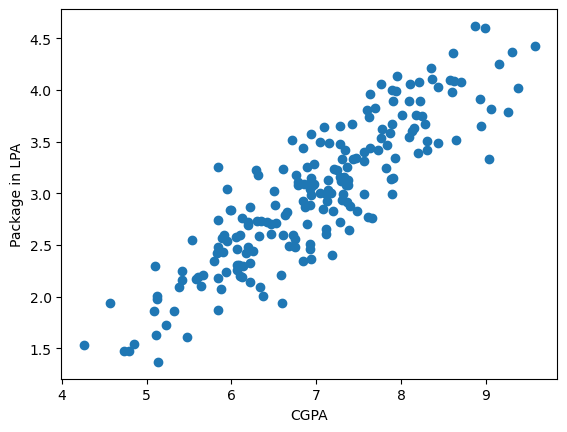

In [17]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")

In [40]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [41]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package in LPA')

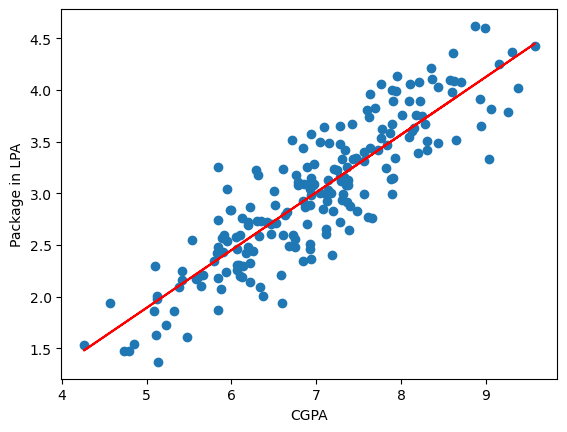

In [46]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")

In [47]:
y_pred = lr.predict(X_test)

In [49]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MAE: 0.2884710931878175


In [50]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 0.12129235313495527


In [52]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.780730147510384


In [55]:
# Adjusted R2 score
r2 = r2_score(y_test, y_pred)
X_test.shape

(40, 1)

In [56]:
1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 1)

0.7749598882343415

In [57]:
# Add the new irrelevant random feature to the dataset and see what changes occur in the r2 score and adjusted r2 score
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.200882,3.26
1,5.12,0.377452,1.98
2,7.82,0.159064,3.25
3,7.42,0.926338,3.67
4,6.94,0.513452,3.57


Text(0, 0.5, 'Package in LPA')

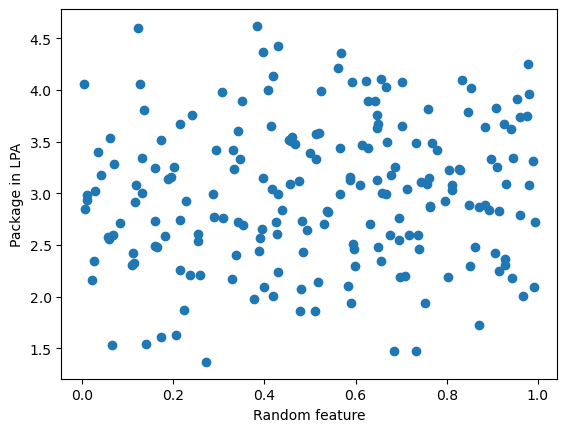

In [58]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel("Random feature")
plt.ylabel("Package in LPA")

In [70]:
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

In [71]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test)

In [75]:
y_pred

array([3.93179545, 3.12878105, 2.38347152, 2.51990287, 1.69529777,
       1.80752391, 2.07709502, 2.92354936, 3.76522396, 2.98828201,
       4.07164124, 3.4938003 , 3.01832988, 2.4336085 , 3.17516211,
       3.41400668, 1.94483346, 3.30135484, 3.03537062, 3.38323635,
       2.5793935 , 3.19159338, 2.89151056, 3.12387636, 3.69202015,
       2.80595483, 3.49316699, 3.28859408, 3.92963358, 2.03114323,
       3.66645742, 3.15278141, 3.72846889, 2.79845627, 2.74246629,
       3.33185361, 3.47102268, 2.65713587, 2.64656846, 2.67845238])

In [76]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.7896544946200337


In [77]:
# Adjusted R2 score
r2 = r2_score(y_test, y_pred)
X_test.shape

(40, 2)

In [78]:
1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 2)

0.7782844673021976

In [79]:
# Add the new relevant random feature to the dataset and see what changes occur in the r2 score and adjusted r2 score
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12, 12, 200)/10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]
new_df2.head()

,cgpa,iq,package
0,6.89,2.46,3.26
1,5.12,1.78,1.98
2,7.82,4.35,3.25
3,7.42,2.57,3.67
4,6.94,4.17,3.57


Text(0, 0.5, 'Package in LPA')

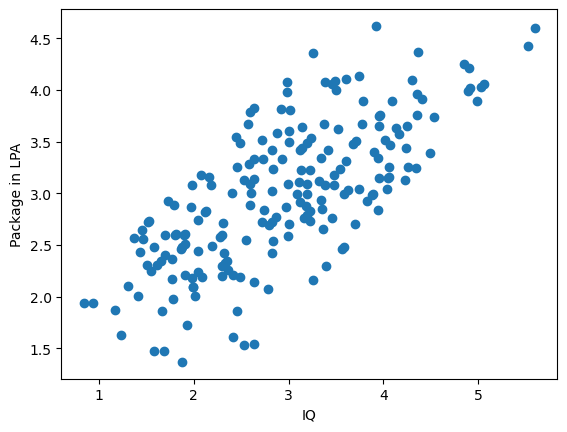

In [80]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel("IQ")
plt.ylabel("Package in LPA")

In [81]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

In [82]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = lr.predict(X_test)

In [86]:
y_pred

array([3.98084824, 2.9786488 , 2.46106193, 2.52653329, 1.48762812,
       1.73241327, 1.9878753 , 2.86709063, 3.99654618, 2.94620888,
       4.07499721, 3.51619323, 2.89875677, 2.28225781, 3.17333309,
       3.6468595 , 2.04087049, 3.11649373, 2.7423134 , 3.42358564,
       2.36573607, 3.38294771, 2.67283416, 3.14653046, 3.63287283,
       2.59550903, 3.38091519, 3.28429354, 3.84446282, 1.84832527,
       3.75295644, 3.19731707, 3.74288962, 2.42557632, 2.61146489,
       3.29026444, 3.61613703, 2.71524051, 2.53157287, 2.53754994])

In [87]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.8197862326384587


In [88]:
# Adjusted R2 score
r2 = r2_score(y_test, y_pred)
X_test.shape

(40, 2)

In [89]:
1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 2)

0.8100449479162133